In [ ]:

command_str = '{sys.executable} -m pip install --upgrade statsmodels'.format(sys=sys)
print(command_str)
!{command_str}

In [1]:

%run ../../load_magic/storage.py
%run ../../load_magic/paths.py
%run ../../load_magic/lists.py
%run ../../load_magic/environment.py
%run ../../load_magic/dataframes.py

from bs4 import BeautifulSoup as bs
import networkx as nx
import re
import urllib.request

notebook_path = get_notebook_path()
print(notebook_path)
s = Storage()
print(['s.{}'.format(fn) for fn in dir(s) if not fn.startswith('_')])

%pprint
dir()

C:\Users\dev\Documents\repositories\notebooks\Miscellaneous\ipynb\Corona Virus Exploration.ipynb
['attempt_to_pickle', 'data_csv_folder', 'data_folder', 'encoding_type', 'load_csv', 'load_dataframes', 'load_object', 'save_dataframes', 'saves_csv_folder', 'saves_folder', 'saves_pickle_folder', 'store_objects']
Pretty printing has been turned OFF
Config	 RandomForestClassifier	 SequenceMatcher	 Storage	 bs	 check_4_doubles	 check_for_typos	 conjunctify_list	 copyfile	 
csv	 encoding	 example_iterrows	 get_classifier	 get_column_descriptions	 get_data_structs_df	 get_datastructure_prediction	 get_dir_tree	 get_git_lfs_track_commands	 
get_importances	 get_input_sample	 get_max_rsquared_adj	 get_module_version	 get_notebook_path	 get_page_tables	 get_specific_gitignore_files	 get_struct_name	 humanize_bytes	 
ipykernel	 json	 jupyter_config_dir	 math	 notebook_path	 notebookapp	 nx	 os	 pd	 
pickle	 plt	 preprocess_data	 print_all_files_ending_starting_with	 print_all_files_ending_with	 pr

In [2]:

def get_page_soup(page_url):
    with urllib.request.urlopen(page_url) as response:
        page_html = response.read()
    page_soup = bs(page_html, 'html.parser')
    
    return page_soup

In [21]:

tables_url = 'https://www.zorinaq.com/pub/ncov-comparison.html'
ncov_path = os.path.join(s.data_folder, 'html', 'ncov-comparison.html')
#page_soup = get_page_soup(tables_url)
tables_list = get_page_tables(tables_url)

[(0, (13, 7))]


In [54]:

import numpy as np

pandemic_df = tables_list[0].copy()
pandemic_df.columns = ['Disease', 'Transmission', 'R0', 'Case_fatality_ratio', 'Hospitalized_cases_sent_to_ICU',
                       'Asymptomatic_transmission', 'Year_vaccine_available']

def f(x):
    result = re.sub(r' *\(', ' (', str(x))
    
    return result

pandemic_df.Disease = pandemic_df.Disease.map(f)

def f(x):
    result = re.sub(r'⁹', '', str(x))
    
    return result

pandemic_df.Transmission = pandemic_df.Transmission.map(f)
pandemic_df['R0_high'] = np.nan

def f(x):
    result = str(x).split('-')[-1]
    result = re.sub(r'[^0-9.]+', '', result)
    
    return float(result)

pandemic_df['R0_high'] = pandemic_df.R0.map(f)
pandemic_df['R0_low'] = np.nan

def f(x):
    result_list = str(x).split('-')
    if len(result_list) < 3:
        result = result_list[0]
    else:
        result = result_list[1].split(' ')[-1]
    result = re.sub(r'[^0-9.]+', '', result)
    
    return float(result)

pandemic_df['R0_low'] = pandemic_df.R0.map(f)
pandemic_df['CFR_high'] = np.nan

def f(x):
    result = str(x).split('-')[-1]
    result = re.sub(r'[^0-9.]+', '', result)
    
    return float(result)

pandemic_df['CFR_high'] = pandemic_df.Case_fatality_ratio.map(f)
pandemic_df['CFR_low'] = np.nan

def f(x):
    result_list = str(x).split('-')
    result = result_list[0]
    result = re.sub(r'[^0-9.]+', '', result)
    
    return float(result)

pandemic_df['CFR_low'] = pandemic_df.Case_fatality_ratio.map(f)
#print(pandemic_df.R0.unique().tolist())
#print(pandemic_df.R0.map(f).unique().tolist())
s.store_objects(pandemic_df=pandemic_df)
pandemic_df.sample(5).T

Pickling to C:\Users\dev\Documents\repositories\notebooks\Miscellaneous\saves\pickle\pandemic_df.pickle


,9,0,7,4,12
Disease,Seasonal flu,Pertussis,MERS,Rubella,Novel coronavirus (2019-nCoV)
Transmission,Airborne,Airborne droplet,Airborne droplet,Airborne droplet,Airborne droplet
R0,1-2,9.9-11.5,<1¹,5-7,1.4-2.5² 2.47-2.86⁶
Case_fatality_ratio,< 0.1%,4%,34%¹,3-6% (developing world),1.8%⁴
Hospitalized_cases_sent_to_ICU,5-10%⁵,NaN,NaN,NaN,23%³
Asymptomatic_transmission,Yes,NaN,No,NaN,Suspected¹⁰
Year_vaccine_available,seasonal,1930s,NaN,1970,NaN
R0_high,2,11.5,1,7,2.86
R0_low,1,9.9,1,5,2.47
CFR_high,0.1,4,34,6,1.8


In [39]:

!start %windir%\explorer.exe "{os.path.abspath(os.path.dirname(notebook_path))}"

In [40]:

column_description_dict = s.load_object('column_description_dict')

In [41]:

def get_column_description(column_name):
    if column_name in column_description_dict:
        column_description = column_description_dict[column_name]
    else:
        column_description = re.sub('^pf_', 'Personal Freedom:_', str(column_name), 1)
        column_description = re.sub('^hf_', 'Human Freedom:_', str(column_description), 1)
        column_description = re.sub('^ef_', 'Economic Freedom:_', str(column_description), 1)
        column_list = column_description.split('_')
        descr_list = []
        for word in column_list:
            descr_list.append(word[0].upper()+word[1:])
        column_description = ' '.join(descr_list)
        column_description_dict[column_name] = column_description
        s.store_objects(column_description_dict=column_description_dict)
    
    return column_description

In [53]:

for column_name in pandemic_df.columns:
    print(column_name, get_column_description(column_name=column_name))

Disease Disease Name
Transmission Transmission Method
R0 Basic Reproduction Number
Case_fatality_ratio Case Fatality Ratio
Hospitalized_cases_sent_to_ICU Hospitalized Cases Sent To ICU
Asymptomatic_transmission Asymptomatic Transmission
Year_vaccine_available Year Vaccine Available
R0_high Basic Reproduction Number (High Range)
R0_low Basic Reproduction Number (Low Range)
CFR_high Case Fatality Ratio (High Range)
CFR_low Case Fatality Ratio (Low Range)


In [143]:

svg_dir = os.path.join(s.saves_folder, 'svg')
os.makedirs(name=svg_dir, exist_ok=True)

In [188]:

def show_linear_scatterplot(merged_df, columns_list, ev_min_str=None, ev_max_str=None, rv_min_str=None, rv_max_str=None):
    ev_column_name = columns_list[0]
    rv_column_name = columns_list[1]
    explanatory_variable = get_column_description(ev_column_name)
    response_variable = get_column_description(rv_column_name)
    if (ev_min_str is None):
        ev_min_str = 'minimum {}'.format(explanatory_variable)
    if (ev_max_str is None):
        ev_max_str = 'maximum {}'.format(explanatory_variable)
    if (rv_min_str is None):
        rv_min_str = 'minimum {}'.format(response_variable)
    if (rv_max_str is None):
        rv_max_str = 'maximum {}'.format(response_variable)
    
    df = merged_df.copy()
    columns_list = [ev_column_name, rv_column_name]
    df = df[columns_list+['Disease']].dropna()
    ev_max = df[ev_column_name].max()
    ev_min = df[ev_column_name].min()
    rv_min = df[rv_column_name].min()
    rv_max = df[rv_column_name].max()
    ev_max_labeled = False
    ev_min_labeled = False
    rv_min_labeled = False
    rv_max_labeled = False
    
    # First order (linear) scatterplot
    fig1_fig = plt.figure(figsize=(12,8))
    merge_axes_subplot = plt.scatter(x=df[ev_column_name].tolist(), y=df[rv_column_name].tolist(), s=None, c=None, marker=None, cmap=None,
                                     norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=None, edgecolors=None,
                                     plotnonfinite=False, data=df)
    xlabel_text = plt.xlabel('{}'.format(explanatory_variable))
    ylabel_text = plt.ylabel('{}'.format(response_variable))
    
    # Add annotations
    for label, x, y in zip(df.Disease, df[ev_column_name], df[rv_column_name]):
        if (x == ev_min):
            if not ev_min_labeled:
                ev_min_labeled = True
                annotation = plt.annotate('{} ({})'.format(label, ev_min_str), xy=(x, y), xytext=ev_min_xytext, **kwargs)
        elif (x == ev_max):
            if not ev_max_labeled:
                ev_max_labeled = True
                annotation = plt.annotate('{} ({})'.format(label, ev_max_str), xy=(x, y), xytext=ev_max_xytext, **kwargs)
        elif (y == rv_min):
            if not rv_min_labeled:
                rv_min_labeled = True
                annotation = plt.annotate('{} ({})'.format(label, rv_min_str), xy=(x, y), xytext=rv_min_xytext, **kwargs)
        elif (y == rv_max):
            if not rv_max_labeled:
                rv_max_labeled = True
                annotation = plt.annotate('{} ({})'.format(label, rv_max_str), xy=(x, y), xytext=rv_max_xytext, **kwargs)
        elif (label == 'SARS'):
            annotation = plt.annotate('{}'.format(label), xy=(x, y), xytext=(50, -20), **kwargs)
        elif ('Kong' in label):
            annotation = plt.annotate('{}'.format(label), xy=(x, y), xytext=(-65, 120), **kwargs)
        elif ('Swine' in label):
            annotation = plt.annotate('{}'.format(label), xy=(x, y), xytext=(-50, 100-2.7842095), **kwargs)
        elif ('Seasonal' in label):
            annotation = plt.annotate('{}'.format(label), xy=(x, y), xytext=(-25, 70-1.9397546), **kwargs)
        elif ('corona' in label):
            annotation = plt.annotate('{}'.format(label), xy=(x, y), xytext=(-85, 20), **red_kwargs)
        else:
            annotation = plt.annotate('{}'.format(label), xy=(x, y), xytext=ev_min_xytext, **kwargs)
    
    # Add r-squared
    x = df[ev_column_name].values
    y = df[rv_column_name].values
    plt.text(17.4, 34.4, r'$r^2 = {0:.2}$'.format(stats.pearsonr(x, y)[0] ** 2), fontsize=20, alpha=0.25,
             horizontalalignment='center', verticalalignment='center')
    plt.suptitle(t='Relative Deadliness and Infectiousness of the Wuhan Flu Pandemic', x=0.5, y=0.91)
    left, right = plt.xlim()
    bottom, top = plt.ylim()
    file_path = os.path.join(svg_dir, 'pandemic.svg')
    plt.savefig(file_path)
    with open(file_path, 'r') as f:
        xml_str = f.read()
        d_regex = re.compile('d="([^"\r\n]+)[\r\n]+')
        while d_regex.search(xml_str):
            xml_str = d_regex.sub(r'd="\g<1>', xml_str)
        with open(file_path, 'w') as f:
            print(xml_str.strip(), file=f)
    
    return file_path, left, right, bottom, top

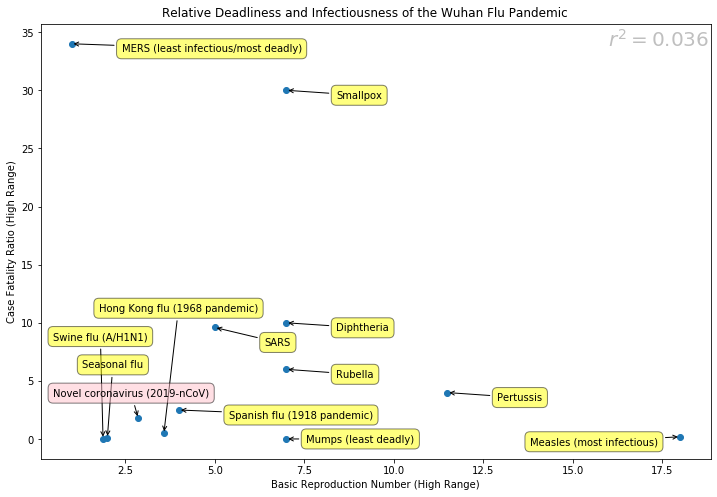

In [189]:

pandemic_df = s.load_object('pandemic_df')
kwargs = dict(textcoords='offset points', ha='left', va='bottom',
              bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
              arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))
red_kwargs = dict(textcoords='offset points', ha='left', va='bottom',
                  bbox=dict(boxstyle='round,pad=0.5', fc='pink', alpha=0.5),
                  arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))

ev_column_name = 'R0_high'
rv_column_name = 'CFR_high'

ev_min_str = 'least infectious/most deadly'
ev_max_str = 'most infectious'
rv_min_str = 'least deadly'
rv_max_str = 'most deadly'
ev_min_xytext = (50, -10)
ev_max_xytext = (-150, -10)
rv_min_xytext = (20, -5)
rv_max_xytext = (100, -50)
columns_list = [ev_column_name, rv_column_name]
file_path, left, right, bottom, top = show_linear_scatterplot(pandemic_df, columns_list, ev_min_str=ev_min_str,
                                                              ev_max_str=ev_max_str, rv_min_str=rv_min_str,
                                                              rv_max_str=rv_max_str)
!start %windir%\explorer.exe "{os.path.abspath(os.path.dirname(file_path))}"

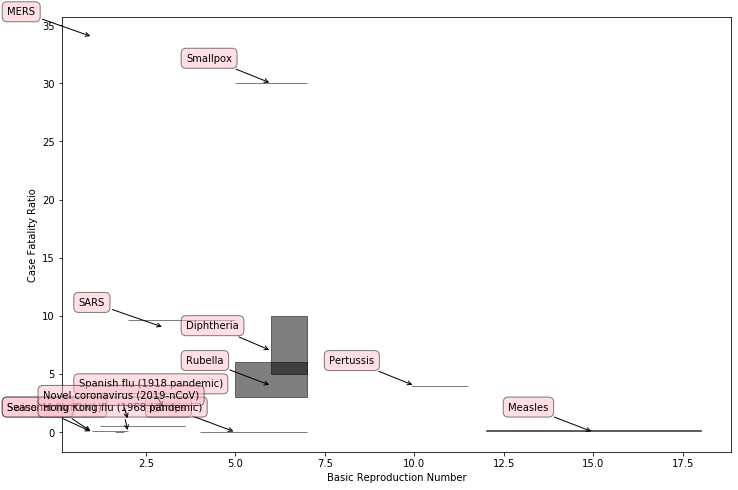

In [182]:

columns_list = ['Disease', 'R0_high', 'R0_low', 'CFR_high', 'CFR_low']
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
match_series = (pandemic_df.Disease == 'Rubella')
for row_index, row_series in pandemic_df[columns_list].iterrows():
    Disease = row_series['Disease']
    R0_high = row_series['R0_high']
    R0_low = row_series['R0_low']
    CFR_high = row_series['CFR_high']
    CFR_low = row_series['CFR_low']
    rect = matplotlib.patches.Rectangle((R0_low, CFR_low), R0_high-R0_low, CFR_high-CFR_low, color='black', alpha=0.5)
    ax.add_patch(rect)
    annotation = plt.annotate('{}'.format(Disease), xy=(int((R0_high+R0_low)/2), int((CFR_high+CFR_low)/2)), xytext=(-85, 20), **red_kwargs)
plt.xlim(left, right)
bottom, top = plt.ylim(bottom, top)
xlabel_text = plt.xlabel('Basic Reproduction Number')
ylabel_text = plt.ylabel('Case Fatality Ratio')

In [178]:

Disease, R0_high, R0_low, CFR_high, CFR_low

('Rubella', 7.0, 5.0, 6.0, 3.0)

In [ ]:

merge_axes_subplot = plt.scatter(x=df[ev_column_name].tolist(), y=df[rv_column_name].tolist(), s=None, c=None, marker=None, cmap=None,
                                 norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=None, edgecolors=None,
                                 plotnonfinite=False, data=df)

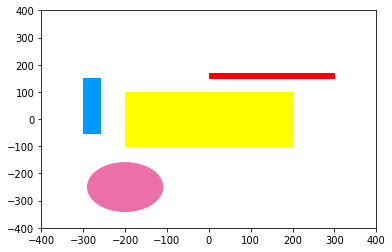

In [151]:

import matplotlib
import matplotlib.pyplot as plt

fig = plt.figure()
rect1 = matplotlib.patches.Rectangle((-200,-100), 400, 200, color='yellow')
rect2 = matplotlib.patches.Rectangle((0,150), 300, 20, color='red')
rect3 = matplotlib.patches.Rectangle((-300,-50), 40, 200, color='#0099FF')
circle1 = matplotlib.patches.Circle((-200,-250), radius=90, color='#EB70AA')
ax.add_patch(rect1)
ax.add_patch(rect2)
ax.add_patch(rect3)
ax.add_patch(circle1)
plt.xlim([-400, 400])
plt.ylim([-400, 400])
plt.show()

In [153]:

print(['plt.{}'.format(fn) for fn in dir(plt) if 'lim' in fn.lower()])

['plt.clim', 'plt.xlim', 'plt.ylim']


In [158]:

plt.ylim?

Signature: plt.ylim(*args, **kwargs)
Docstring:
Get or set the y-limits of the current axes.

Call signatures::

    bottom, top = ylim()  # return the current ylim
    ylim((bottom, top))   # set the ylim to bottom, top
    ylim(bottom, top)     # set the ylim to bottom, top

If you do not specify args, you can alternatively pass *bottom* or
*top* as kwargs, i.e.::

    ylim(top=3)  # adjust the top leaving bottom unchanged
    ylim(bottom=1)  # adjust the bottom leaving top unchanged

Setting limits turns autoscaling off for the y-axis.

Returns
-------
bottom, top
    A tuple of the new y-axis limits.

Notes
-----
Calling this function with no arguments (e.g. ``ylim()``) is the pyplot
equivalent of calling `~.Axes.get_ylim` on the current axes.
Calling this function with arguments is the pyplot equivalent of calling
`~.Axes.set_ylim` on the current axes. All arguments are passed though.
File:      c:\users\dev\anaconda3\lib\site-packages\matplotlib\pyplot.py
Type:      function
